In [ ]:
!pip install ucimlrepo

In [9]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [21]:

print(f"Number of missing values before : {X.isnull().sum().sum()}")

rows_removed = X[X.isnull().any(axis=1)].index
X_cleaned = X.dropna()
y_cleaned = y.drop(rows_removed)

print(f"Number of missing values after : {X_cleaned.isnull().sum().sum()}")

Number of missing values before : 6
Number of missing values after : 0


In [19]:
X_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [22]:
categorical_cols = ["cp", "slope", "thal", "restecg"]
X_encoded = pd.get_dummies(X_cleaned, columns=categorical_cols, drop_first=True)

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

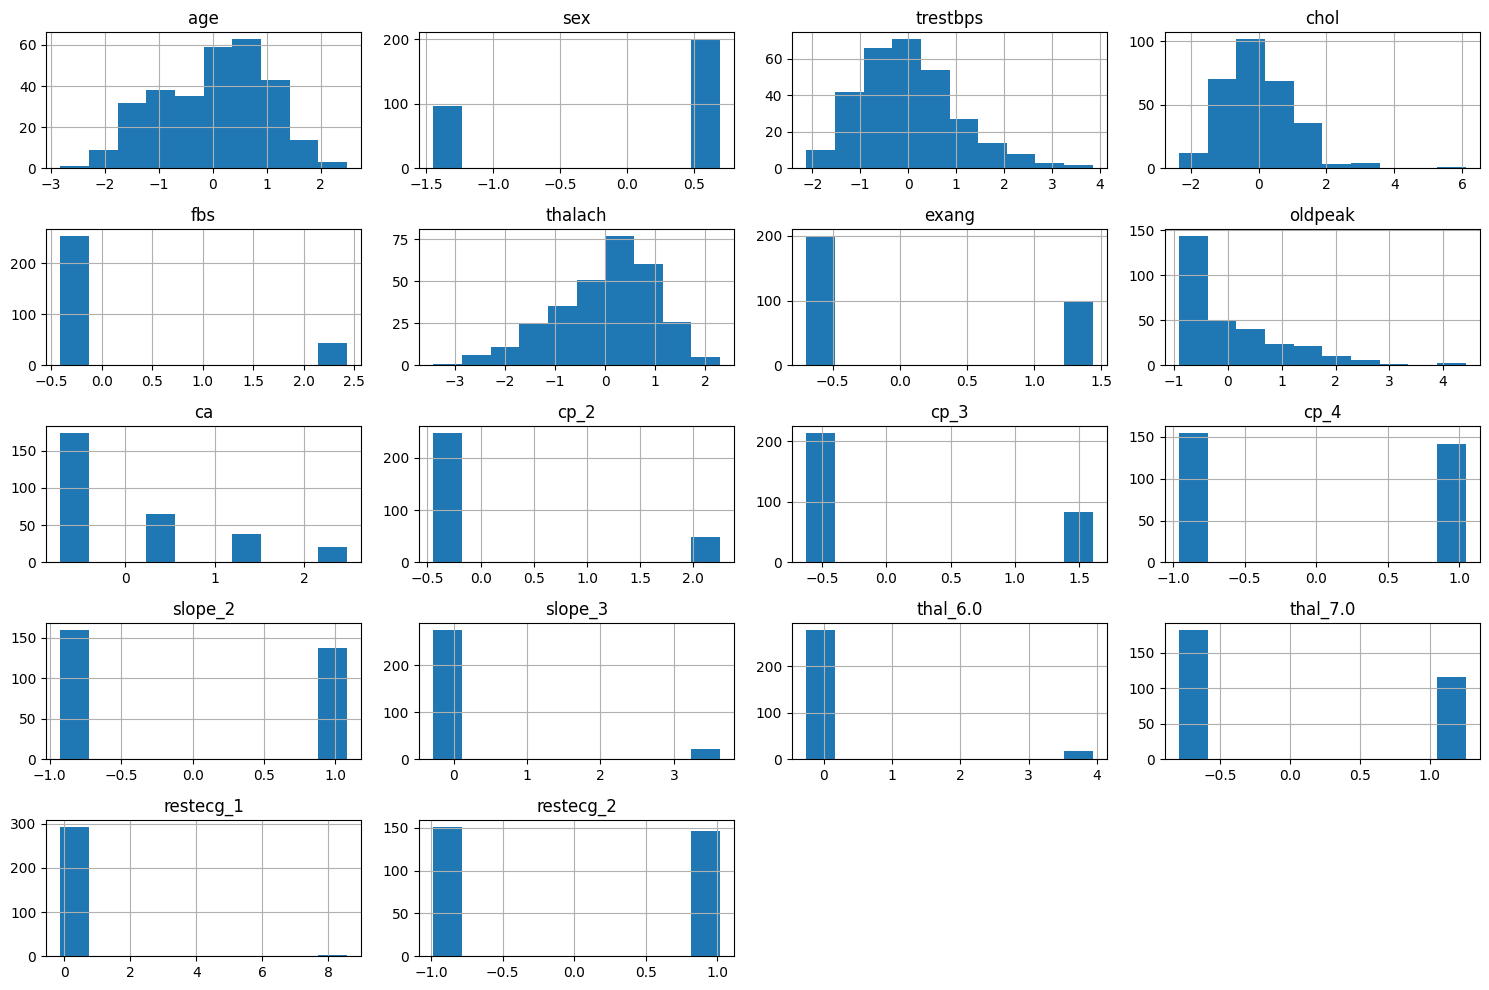

In [28]:
import matplotlib.pyplot as plt
X_scaled.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

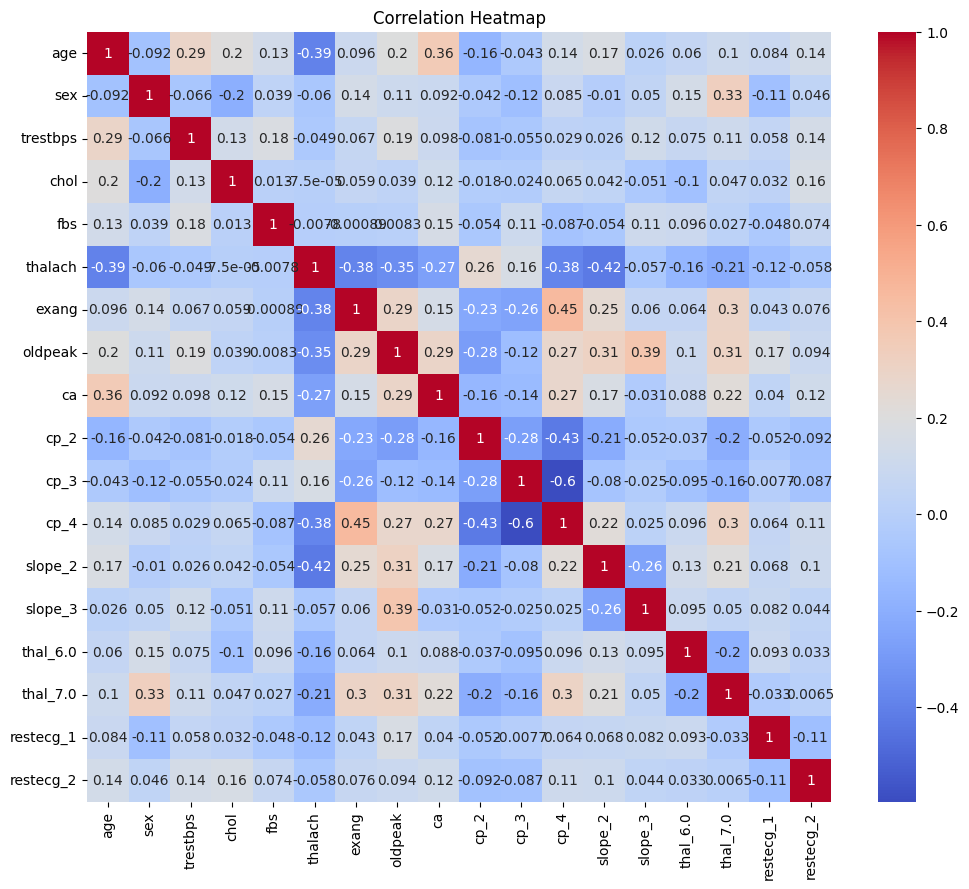

In [26]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


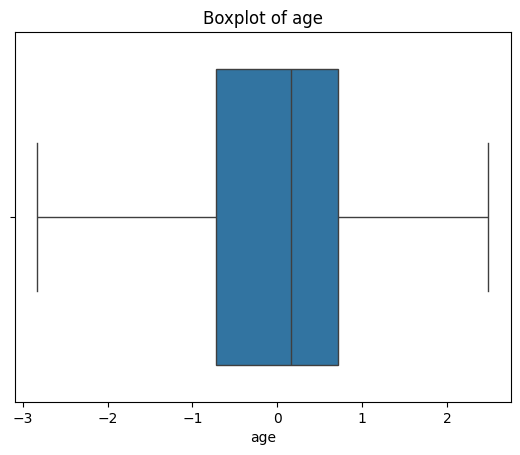

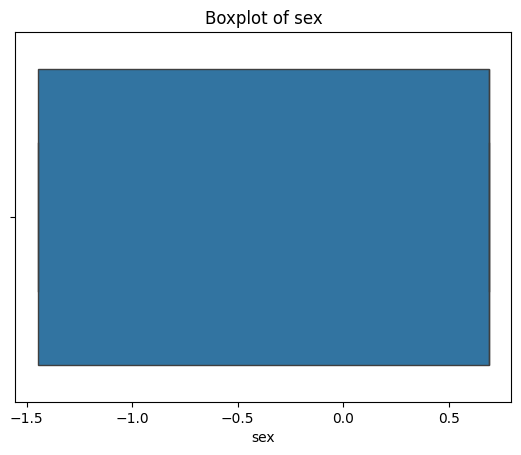

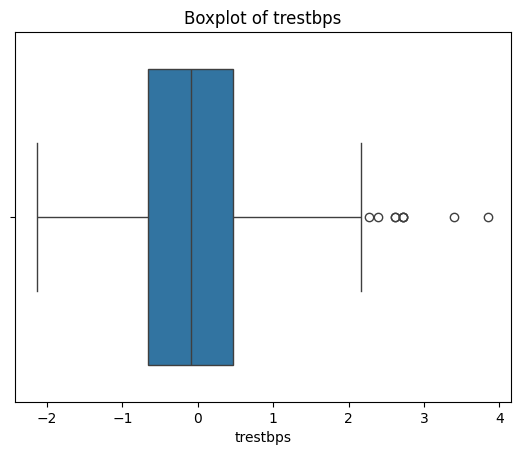

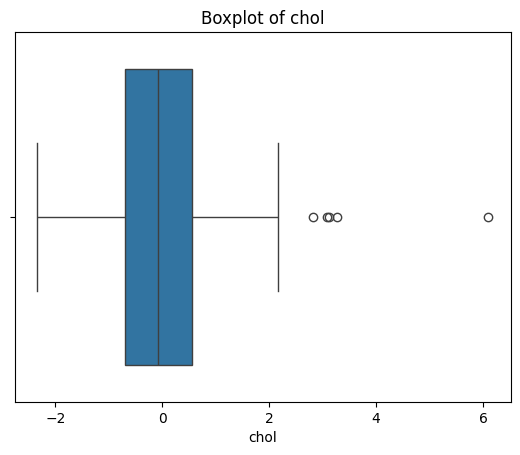

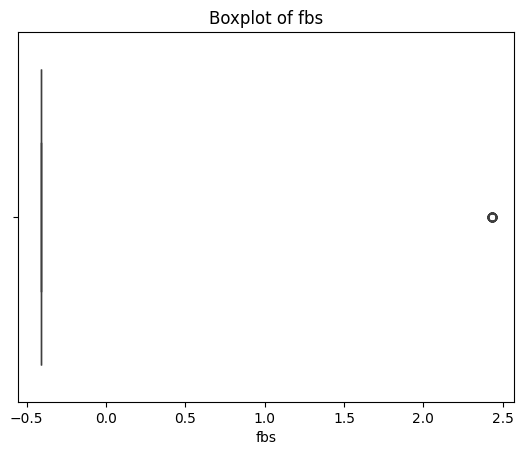

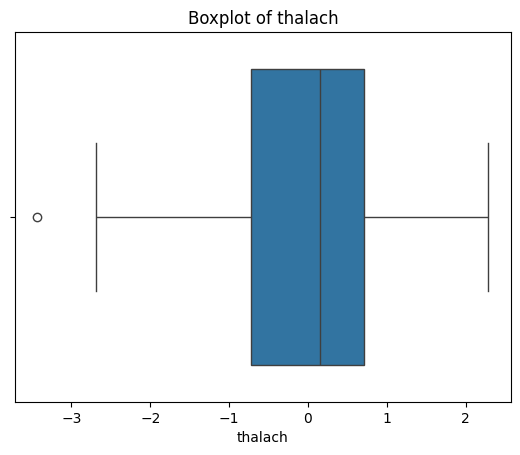

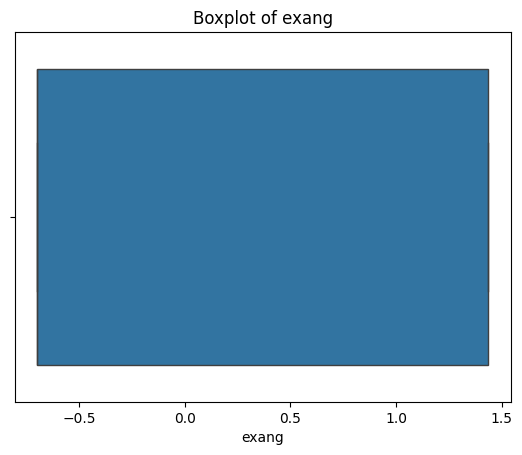

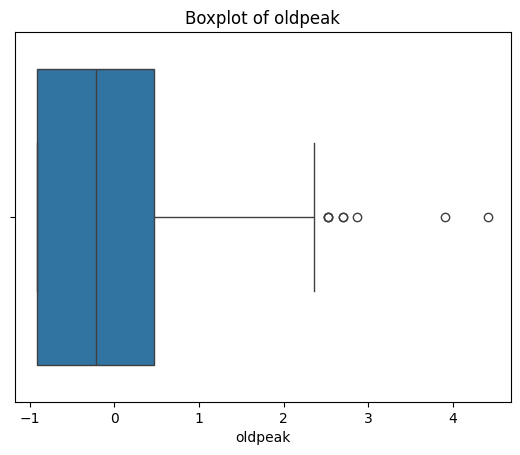

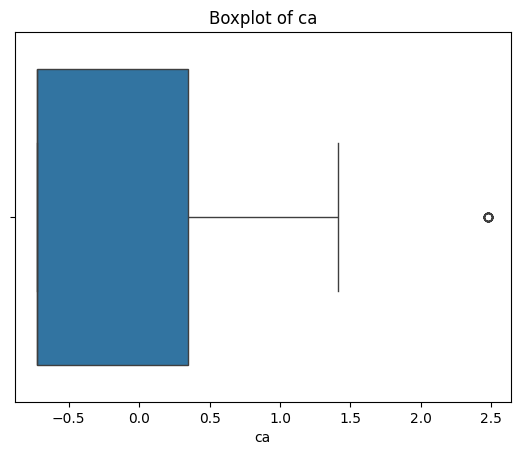

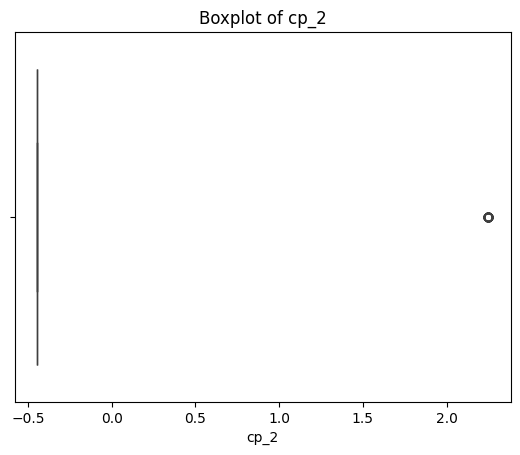

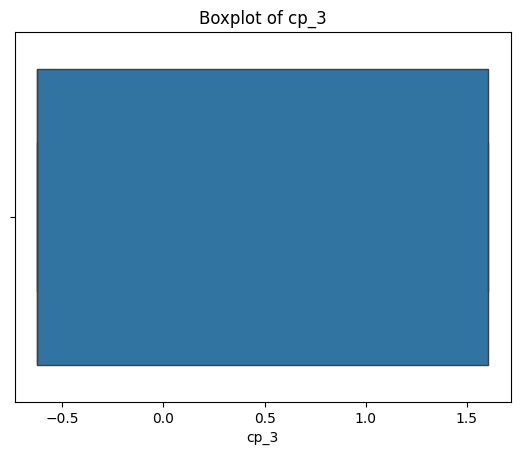

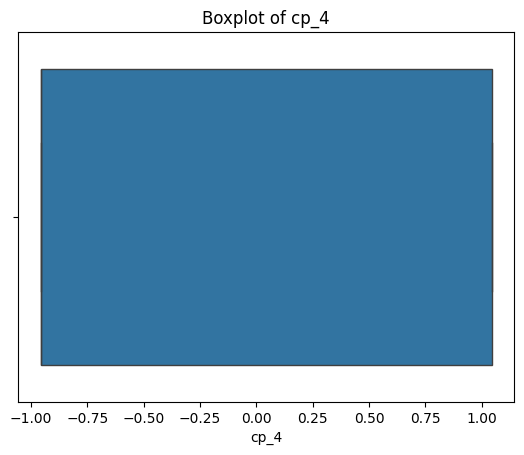

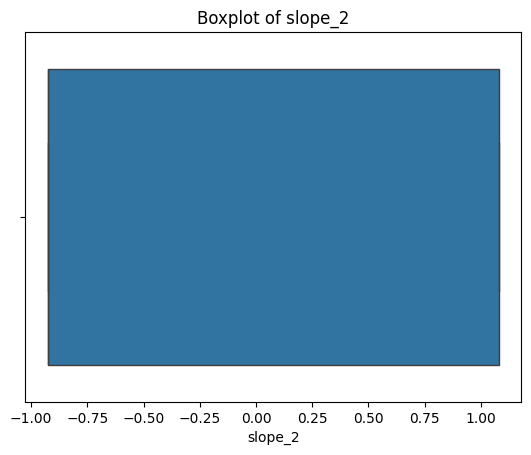

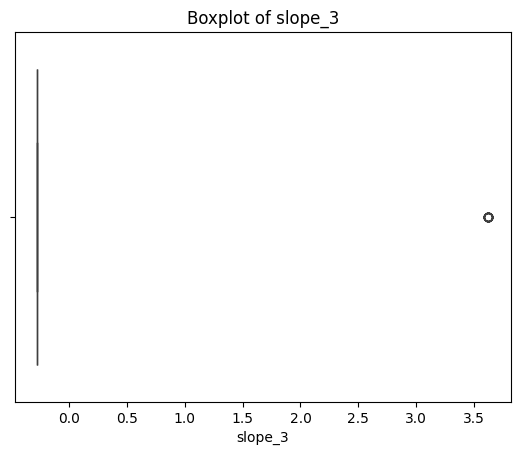

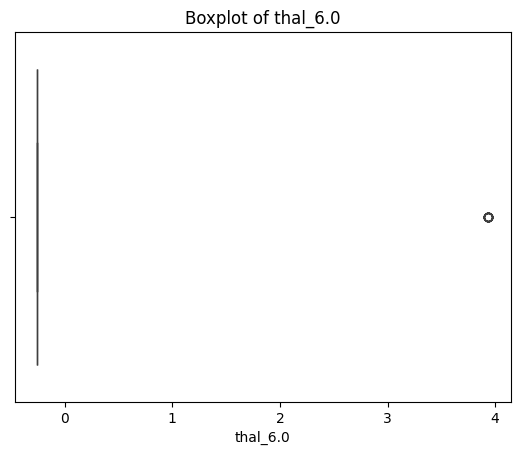

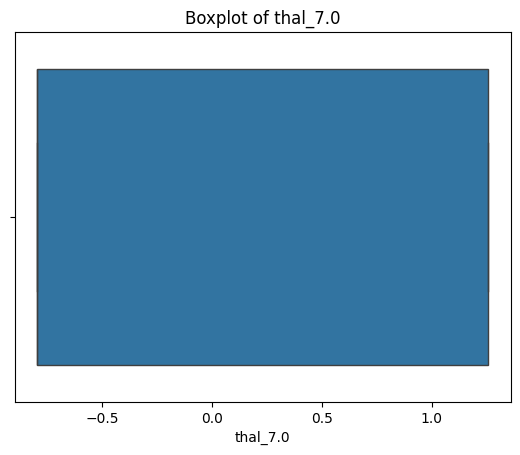

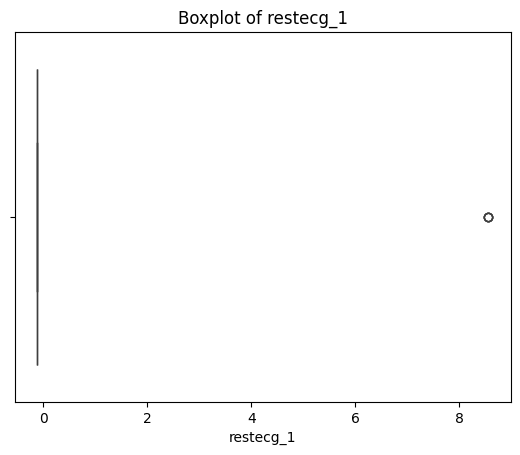

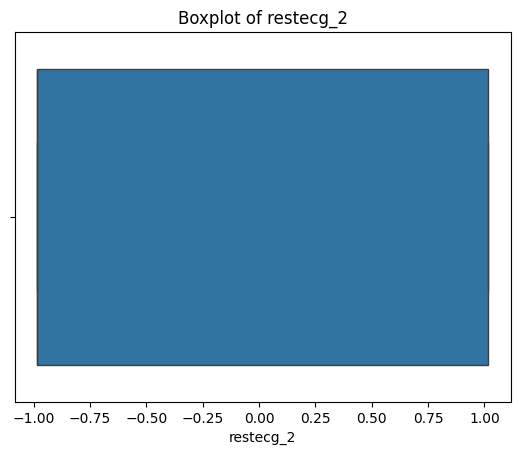

In [27]:
for col in X_scaled.columns:
    plt.figure()
    sns.boxplot(x=X_scaled[col])
    plt.title(f"Boxplot of {col}")
    plt.show()